## Import Library

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Eksplorasi Data

In [1]:
import pandas as pd

# Baca dataset
df = pd.read_csv('dataset/reviews.csv')

# Lihat struktur data
print(df.shape)
df.head()


(3000, 4)


,userName,score,content,at
0,Meilinda sari,5,memang sangat d perlukan tp pastikan BMKG haru...,2025-05-26 05:24:01
1,Sarman Simamora,5,membantu mengetahui keadaan cuaca,2025-05-25 14:32:44
2,lilik putut armunanto lilik,5,Good,2025-05-25 11:23:59
3,imam tirta,5,membantu sekali,2025-05-25 10:28:27
4,Andhez Nikko,5,cukup membantu,2025-05-25 06:55:58


#### Score

In [2]:
df['score'].value_counts().sort_index()


score
1     435
2     225
3     315
4     300
5    1725
Name: count, dtype: int64

#### Lebel

In [3]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

df['label'] = df['score'].apply(label_sentiment)
df['label'].value_counts()


label
positif    2025
negatif     660
netral      315
Name: count, dtype: int64

#### Membersihkan Teks

In [4]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\n', ' ', text)  # hapus newline
    text = re.sub(r'http\S+', '', text)  # hapus link
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip()
    return text

df['clean_content'] = df['content'].astype(str).apply(clean_text)


In [12]:
%pip install nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_ind = stopwords.words('indonesian')

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords_ind])

df['clean_content'] = df['clean_content'].apply(remove_stopwords)


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 284.6 kB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/273.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/273.6 kB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 92.2/273.6 kB 1.3 MB/s eta 0:00:01
   -------------------- ------------------- 143.4/273.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 194.6/273.6 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 256.0/273.6 kB 1.2 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to C:\Users\Yoga
[nltk_data]     Samudra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split

# Ambil kolom teks & label
X = df['clean_content']
y = df['label']

# Split ke training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.7 kB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 4.5 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.1 MB 7.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.1 MB 8.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.1 MB 8.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 8.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.1 MB 9.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.1 MB 9.9 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.1 MB 9.8 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Buat TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


#### Visualisasi

**Lebel Sentimen**

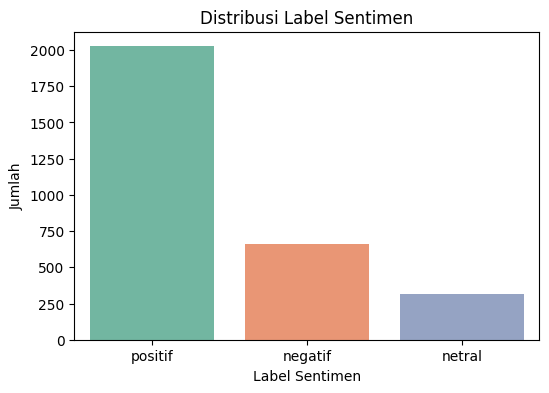

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', hue='label', palette='Set2', dodge=False, legend=False, order=df['label'].value_counts().index)

plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.show()


**Skor Ulasan**

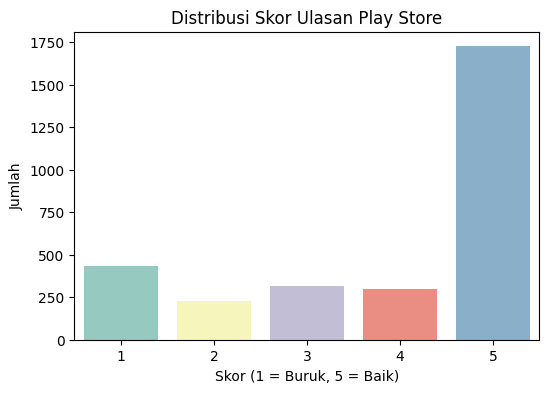

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='score', hue='score', palette='Set3', dodge=False, legend=False, order=sorted(df['score'].unique()))
plt.title('Distribusi Skor Ulasan Play Store')
plt.xlabel('Skor (1 = Buruk, 5 = Baik)')
plt.ylabel('Jumlah')
plt.show()


**Persentase Sentimen**

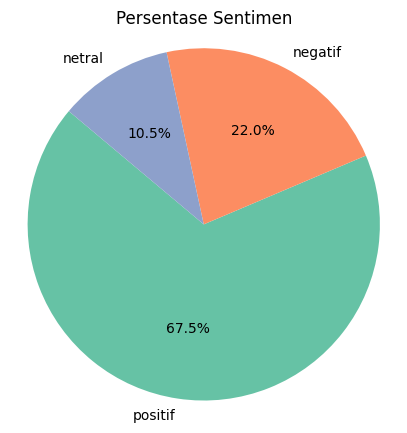

In [28]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.title('Persentase Sentimen')
plt.show()


## Pelatihan Model 

### Model Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi dan latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.99
              precision    recall  f1-score   support

     negatif       0.97      1.00      0.99       132
      netral       1.00      0.97      0.98        63
     positif       1.00      0.99      0.99       405

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



**Visualisasi Confusion Matrix**

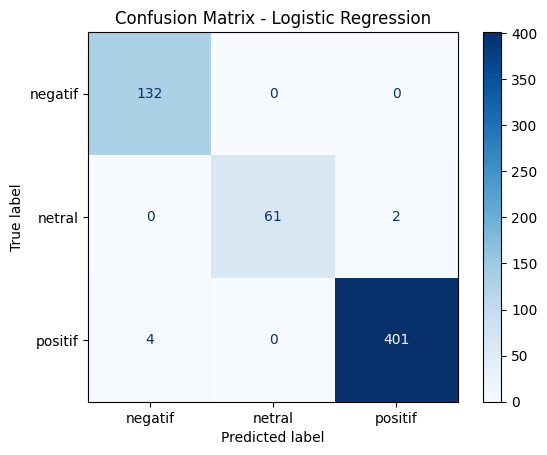

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict data uji
y_pred = model.predict(X_test_tfidf)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negatif', 'netral', 'positif'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negatif', 'netral', 'positif'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Visualisasi Bar Plot: Jumlah Prediksi Tiap Label**

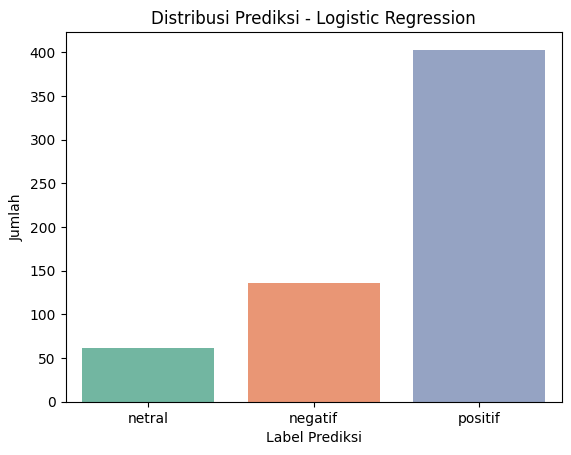

In [46]:
import seaborn as sns

# Bar plot prediksi
sns.countplot(x=y_pred, palette="Set2", hue=y_pred, dodge=False)
plt.title("Distribusi Prediksi - Logistic Regression")
plt.xlabel("Label Prediksi")
plt.ylabel("Jumlah")
plt.show()


### Model SVM

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Ulangi pembagian data (jaga konsistensi split seperti model pertama)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
svm_model = LinearSVC()
svm_model.fit(X_train2_tfidf, y_train2)

# Prediksi
y_pred2 = svm_model.predict(X_test2_tfidf)

# Evaluasi
print("Akurasi SVM:", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))


Akurasi SVM: 0.9866666666666667
              precision    recall  f1-score   support

     negatif       0.96      1.00      0.98       128
      netral       1.00      0.97      0.98        58
     positif       1.00      0.99      0.99       414

    accuracy                           0.99       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.99      0.99      0.99       600



**Visualisasi Confusion Matrix**

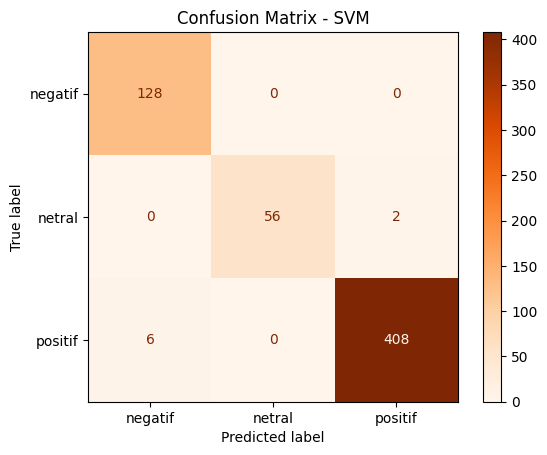

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm2 = confusion_matrix(y_test2, y_pred2, labels=['negatif', 'netral', 'positif'])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['negatif', 'netral', 'positif'])
disp2.plot(cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.show()


**Visualisasi Bar Plot: Jumlah Prediksi Tiap Label**

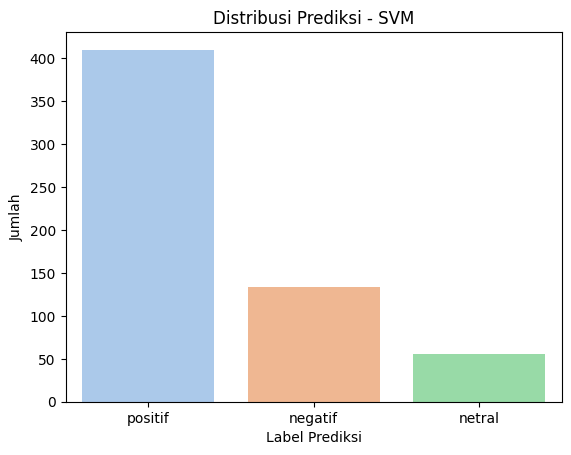

In [49]:
import seaborn as sns

sns.countplot(x=y_pred2, palette="pastel", hue=y_pred2, dodge=False)
plt.title("Distribusi Prediksi - SVM")
plt.xlabel("Label Prediksi")
plt.ylabel("Jumlah")
plt.show()


### Model Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Bagi data dengan split berbeda (70:30)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformasi data ke bentuk TF-IDF
X_train3_tfidf = tfidf.fit_transform(X_train3)
X_test3_tfidf = tfidf.transform(X_test3)

# Inisialisasi dan latih model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train3_tfidf, y_train3)

# Prediksi
y_pred3 = rf_model.predict(X_test3_tfidf)

# Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))


Akurasi Random Forest: 0.98
              precision    recall  f1-score   support

     negatif       0.93      1.00      0.97       199
      netral       1.00      0.96      0.98        93
     positif       0.99      0.98      0.99       608

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



**Visualisasi Confusion Matrix**

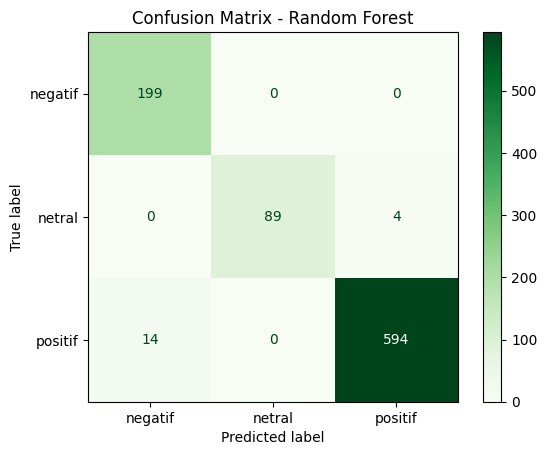

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm_rf = confusion_matrix(y_test3, y_pred3, labels=['negatif', 'netral', 'positif'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['negatif', 'netral', 'positif'])
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Visualisasi Bar Plot: Jumlah Prediksi Tiap Label**

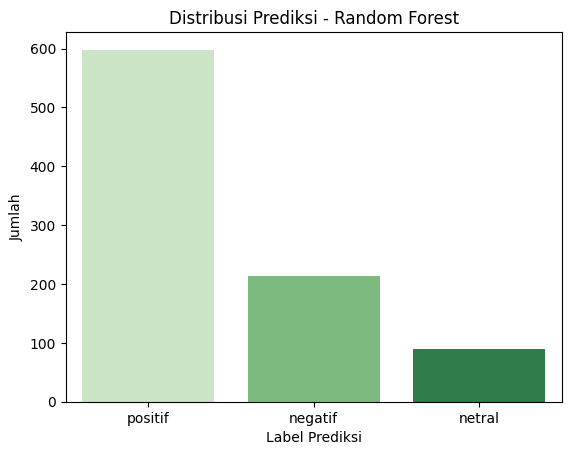

In [54]:
import seaborn as sns

sns.countplot(x=y_pred3, palette="Greens", hue=y_pred3, dodge=False)
plt.title("Distribusi Prediksi - Random Forest")
plt.xlabel("Label Prediksi")
plt.ylabel("Jumlah")
plt.show()
